In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import matplotlib
import warnings
warnings.filterwarnings('ignore')

#matplotlib.rcParams.update({'font.size': 14})

In [2]:
datadir='tracers_mod_LGM/LGM50'
iters=range(64800000,64850000,150000)
prefixes=['dyn','layersDiags','tracer1','tracer2']
dsLGM50=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid = xgcm.Grid(dsLGM50, periodic=['X'])


datadir='tracers_mod_LGM/LGM500'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']
dsLGM500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)


datadir='tracers_mod_LGM/LGM5000'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']
dsLGM5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)


In [3]:
La = dsLGM50.dxC[:,141:].sum('XG').values
Lp = dsLGM50.dxC[:,0:140].sum('XG').values

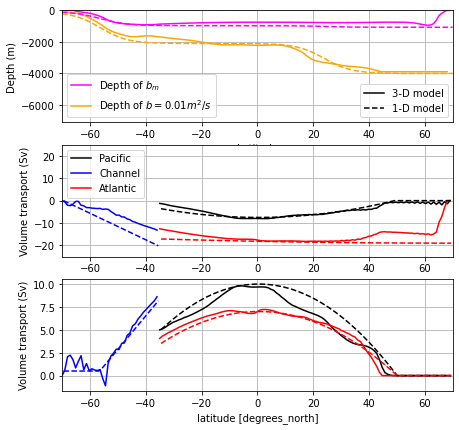

In [4]:
fig = plt.figure(figsize=(7,7))
deepind=27
chanloc=36
plt.subplot(3, 1, 1)
(-dsLGM50.LaHs1RHO[:,0:18,:,140:]).sum('layer_1RHO_center').mean('time').mean('XC').plot(color='magenta')
modelhLGM=30+1100*(np.tanh((np.arange(0,144)-14)/10)+1)/2+1800*(np.tanh((np.arange(0,144)-96)/10)+1)/2
(-dsLGM50.LaHs1RHO[:,0:27,:-1,140:]).sum('layer_1RHO_center').mean('time').mean('XC').plot(color='orange')
llLGM=2000*(np.tanh((np.arange(0,144)-14)/10)+1)/2+100+1900*(np.tanh((np.arange(0,144)-96)/10)+1)/2
#llLGM[llLGM>3000]=3000
llLGM[llLGM>3990]=4000

plt.plot(np.linspace(-70,70,144),-llLGM+modelhLGM,color='magenta',linestyle='dashed')
plt.plot(np.linspace(-70,70,144),-llLGM,color='orange',linestyle='dashed')
faux1=plt.plot([-100, -99],[0,10],'k-',label='3-D model')
faux2=plt.plot([-100, -99],[0,10],'k--',label='1-D model')
leg1=plt.legend(handles=[faux1[0],faux2[0]], loc='lower right')
plt.legend(('Depth of $b_m$','Depth of $b=0.01m^2/s$'))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude')
plt.grid(True)
plt.ylim(-7100,0.5)
plt.xlim(-70,70)
ax=plt.gca()
ax.add_artist(leg1)

plt.subplot(3, 1, 2)
((dsLGM50.LaVH1RHO[:,18:deepind,chanloc:,0:140].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[chanloc:,0:140]).sum('XC')/10**6).plot(color='k')
((dsLGM50.LaVH1RHO[:,18:deepind,:chanloc,:].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[:chanloc,:]).sum('XC')/10**6).plot(color='b')
((dsLGM50.LaVH1RHO[:,18:deepind,chanloc:,140:].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[chanloc:,140:]).sum('XC')/10**6).plot(color='r')
plt.grid(True)
vatlLGM=(-5*np.ones(144)*10**6)-(0.35-(np.arange(0,144)-144)**2/(500)**2)*4*10**7

vpacLGM=-(0.25-(np.arange(0,144)-72)**2/(100)**2)*3*10**7
vpacLGM[vpacLGM>0]=0
vatlLGM[0:chanloc]=(vatlLGM[chanloc]+vpacLGM[chanloc])*np.arange(0,(chanloc))/(chanloc)

plt.plot(dsLGM50.YC[chanloc:],vpacLGM[chanloc:]/10**6,'k--')
plt.plot(dsLGM50.YC[:chanloc],vatlLGM[:chanloc]/10**6,'b--')
plt.plot(dsLGM50.YC[chanloc:],vatlLGM[chanloc:]/10**6,'r--')
plt.ylim(-25,25)
plt.xlim(-70,70)

plt.ylabel('Volume transport (Sv)')
plt.legend(('Pacific', 'Channel','Atlantic'),loc='upper left')

plt.subplot(3, 1, 3)
((dsLGM50.LaVH1RHO[:,deepind:,chanloc:,0:140].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[chanloc:,0:140]).sum('XC')/10**6).plot(color='k')
((dsLGM50.LaVH1RHO[:,deepind:,:chanloc,:].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[:chanloc,:]).sum('XC')/10**6).plot(color='b')
((dsLGM50.LaVH1RHO[:,deepind:,chanloc:,140:].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[chanloc:,140:]).sum('XC')/10**6).plot(color='r')
plt.grid(True)
#vatlLGMll=-3.2*np.ones(144)*10**6+3.2*np.arange(0,144)*10**6/144
#vpacLGMll=3*np.ones(144)*10**6-3*np.arange(0,144)*10**6/144
vatlLGMll=(0.25-(np.arange(0,144)-72)**2/(102)**2)*2.8*10**7#0.8*(np.ones(144)*10**7-np.arange(0,144)*10**7/145)*(1.7+np.tanh((np.arange(0,144)-35)/5))/2
vatlLGMll[vatlLGMll<0]=0
#vpacLGMll=np.ones(144)*10**7-np.arange(0,144)*10**7/144
vpacLGMll=(0.25-(np.arange(0,144)-72)**2/(102)**2)*4*10**7#+1*np.ones(144)*10**7-0.5*np.arange(0,144)*10**7/144#
vpacLGMll[vpacLGMll<0]=0
vatlLGMll[0:12]=0
vatlLGMll[12:chanloc]=(vatlLGMll[chanloc]+vpacLGMll[chanloc])*np.arange(0,(chanloc-12))/(chanloc-12)
vatlLGMll[0:20][vatlLGMll[0:20]<0.5*10**6]=0.5*10**6

plt.plot(dsLGM50.YC[chanloc:],vpacLGMll[chanloc:]/10**6,'k--')
plt.plot(dsLGM50.YC[:chanloc],vatlLGMll[:chanloc]/10**6,'b--')
plt.plot(dsLGM50.YC[chanloc:],vatlLGMll[chanloc:]/10**6,'r--')
#plt.ylim(-22,13)
plt.xlim(-70,70)

plt.ylabel('Volume transport (Sv)')

fig=plt.gcf()
fig.savefig('h_depth_layer.pdf', bbox_inches='tight')

In [5]:
#LGM
buoy=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))
baxis=np.arange(0.002,0.06,0.0002)
tracer_50 = layers_apply(dsLGM50.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(dsLGM50.TRAC01.mean('time')), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')

tracer_500 = layers_apply(dsLGM500.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM500.drF, dsLGM500.drC, 10, 'Z', 'Tlev')
zeta_500 = zeta_50

tracer_5000 = layers_apply(dsLGM5000.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM5000.drF, dsLGM5000.drC, 10, 'Z', 'Tlev')
zeta_5000 = zeta_50


In [6]:
#LGM alt
import redi_analytical as ra
modelkappa=50*np.ones(144)
ntime=54000
chanloc=36
La[0:chanloc]=dsLGM50.dxC[0:chanloc,:].sum('XG').values
kappaz=(2*10**(-5)*np.ones(144)+10**-2*(1+np.tanh((-4000+llLGM+30)/30))/2+(2*10**-4+2*10**-3*(10**((4000-llLGM-4000)/2000)))*(1-np.tanh((-4000+llLGM+2000)/200))/2)*(np.tanh((-4000+llLGM+3930)/10)+1)/2
vatl_in=vatlLGM
vpac_in=vpacLGM
vatl_inll=vatlLGMll
vpac_inll=vpacLGMll
vatl_in[0:chanloc]=vatlLGM[0:chanloc]
vatl_inll[0:chanloc]=vatlLGMll[0:chanloc]
CLGM50,CpacLGM50,CLGM50ll,CpacLGM50ll,iso_diff_atlLGM50,mer_adv_atlLGM50,iso_diff_pacLGM50,mer_adv_pacLGM50,iso_diff_atlLGM50ll,mer_adv_atlLGM50ll,iso_diff_pacLGM50ll,mer_adv_pacLGM50ll=ra.redi_analytical_LGM2(dsLGM50,modelkappa,chanloc,vatl_in,vpac_in,vatl_inll,vpac_inll,La,Lp,llLGM-modelhLGM,llLGM,kappaz,ntime,5*10**-9)

modelkappa=500*np.ones(144)
ntime=54000
chanloc=36
kappaz=(2*10**(-5)*np.ones(144)+10**-2*(1+np.tanh((-4000+llLGM+30)/30))/2+(2*10**-4+2*10**-3*(10**((4000-llLGM-4000)/2000)))*(1-np.tanh((-4000+llLGM+2000)/200))/2)*(np.tanh((-4000+llLGM+3930)/10)+1)/2
vatl_in=vatlLGM
vpac_in=vpacLGM
vatl_inll=vatlLGMll
vpac_inll=vpacLGMll
vatl_in[0:chanloc]=vatlLGM[0:chanloc]
vatl_inll[0:chanloc]=vatlLGMll[0:chanloc]
CLGM500,CpacLGM500,CLGM500ll,CpacLGM500ll,iso_diff_atlLGM500,mer_adv_atlLGM500,iso_diff_pacLGM500,mer_adv_pacLGM500,iso_diff_atlLGM500ll,mer_adv_atlLGM500ll,iso_diff_pacLGM500ll,mer_adv_pacLGM500ll=ra.redi_analytical_LGM2(dsLGM500,modelkappa,chanloc,vatl_in,vpac_in,vatl_inll,vpac_inll,La,Lp,llLGM-modelhLGM,llLGM,kappaz,ntime,2*10**-9)

modelkappa=5000*np.ones(144)
ntime=54000
chanloc=36
kappaz=(2*10**(-5)*np.ones(144)+10**-2*(1+np.tanh((-4000+llLGM+30)/30))/2+(2*10**-4+2*10**-3*(10**((4000-llLGM-4000)/2000)))*(1-np.tanh((-4000+llLGM+2000)/200))/2)*(np.tanh((-4000+llLGM+3930)/10)+1)/2
vatl_in=vatlLGM
vpac_in=vpacLGM
vatl_inll=vatlLGMll
vpac_inll=vpacLGMll
vatl_in[0:chanloc]=vatlLGM[0:chanloc]
vatl_inll[0:chanloc]=vatlLGMll[0:chanloc]
CLGM5000,CpacLGM5000,CLGM5000ll,CpacLGM5000ll,iso_diff_atlLGM5000,mer_adv_atlLGM5000,iso_diff_pacLGM5000,mer_adv_pacLGM5000,iso_diff_atlLGM5000ll,mer_adv_atlLGM5000ll,iso_diff_pacLGM5000ll,mer_adv_pacLGM5000ll=ra.redi_analytical_LGM2(dsLGM5000,modelkappa,chanloc,vatl_in,vpac_in,vatl_inll,vpac_inll,La,Lp,llLGM-modelhLGM,llLGM,kappaz,ntime,0.5*10**-9)

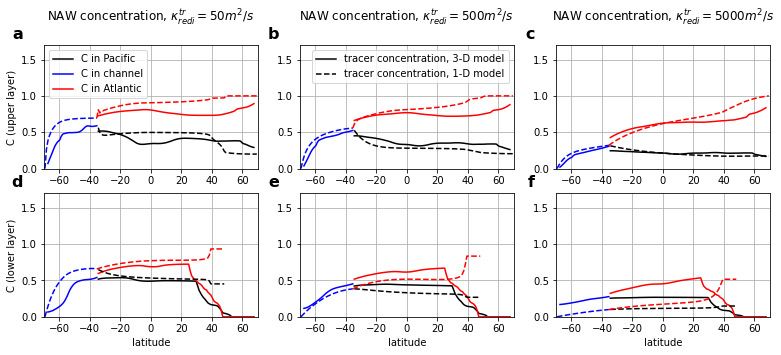

In [7]:
plt.figure(figsize=(13,5))

bm=40
bm2=104


maxll=122

#maxll=140

plt.subplot(2,3,1)


chanloc=36
a1=((((tracer_50[chanloc:-2,0:140,bm:bm2].sum('Tlev')/zeta_50[chanloc:-2,0:140,bm:bm2].sum('Tlev'))*dsLGM50.rA[chanloc:,0:140]).sum('XC'))/(dsLGM50.rA[chanloc:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_50[2:chanloc,:,bm:bm2].sum('Tlev')/zeta_50[2:chanloc,:,bm:bm2].sum('Tlev'))*dsLGM50.rA[2:chanloc,:]).sum('XC'))/(dsLGM50.rA[2:chanloc,:].sum('XC'))).plot(color='b')
a2=((((tracer_50[chanloc:-2,140:,bm:bm2].sum('Tlev')/zeta_50[chanloc:-2,140:,bm:bm2].sum('Tlev'))*dsLGM50.rA[chanloc:-2,140:]).sum('XC'))/(dsLGM50.rA[chanloc:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)


modelhul=llLGM-modelhLGM
a5=plt.plot(dsLGM50.YC[chanloc:],CpacLGM50[chanloc:]/modelhul[chanloc:],'k--')
a4=plt.plot(dsLGM50.YC[:chanloc],CLGM50[:chanloc]/modelhul[:chanloc],'b--')
a4=plt.plot(dsLGM50.YC[chanloc-1:],CLGM50[chanloc-1:]/modelhul[chanloc-1:],'r--')
plt.legend(('C in Pacific', 'C in channel','C in Atlantic'),loc='upper left')
plt.ylabel('C (upper layer)')
plt.ylim(0,1.7)
plt.xlabel('')
plt.xlim(-70,70)
plt.title('NAW concentration, $\kappa_{redi}^{tr}=50m^2/s$\n')

ax=plt.gca()
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(2,3,2)


chanloc=36
a1=((((tracer_500[chanloc:-2,0:140,bm:bm2].sum('Tlev')/zeta_500[chanloc:-2,0:140,bm:bm2].sum('Tlev'))*dsLGM50.rA[chanloc:,0:140]).sum('XC'))/(dsLGM50.rA[chanloc:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_500[2:chanloc,:,bm:bm2].sum('Tlev')/zeta_500[2:chanloc,:,bm:bm2].sum('Tlev'))*dsLGM50.rA[2:chanloc,:]).sum('XC'))/(dsLGM50.rA[2:chanloc,:].sum('XC'))).plot(color='b')
a2=((((tracer_500[chanloc:-2,140:,bm:bm2].sum('Tlev')/zeta_500[chanloc:-2,140:,bm:bm2].sum('Tlev'))*dsLGM50.rA[chanloc:-2,140:]).sum('XC'))/(dsLGM50.rA[chanloc:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

modelhul=llLGM-modelhLGM
a5=plt.plot(dsLGM500.YC[chanloc:],CpacLGM500[chanloc:]/modelhul[chanloc:],'k--')
a4=plt.plot(dsLGM500.YC[:chanloc],CLGM500[:chanloc]/modelhul[:chanloc],'b--')
a4=plt.plot(dsLGM500.YC[chanloc-1:],CLGM500[chanloc-1:]/modelhul[chanloc-1:],'r--')
faux1=plt.plot([-100, -99],[0,10],'k-',label='tracer concentration, 3-D model')
faux2=plt.plot([-100, -99],[0,10],'k--',label='tracer concentration, 1-D model')
plt.legend(handles=[faux1[0],faux2[0]], loc='upper right')

#plt.ylabel('C')
plt.ylim(0,1.7)
plt.xlabel('')
plt.xlim(-70,70)
plt.title('NAW concentration, $\kappa_{redi}^{tr}=500m^2/s$\n')

ax=plt.gca()
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(2,3,3)

chanloc=36
a1=((((tracer_5000[chanloc:-2,0:140,bm:bm2].sum('Tlev')/zeta_5000[chanloc:-2,0:140,bm:bm2].sum('Tlev'))*dsLGM50.rA[chanloc:,0:140]).sum('XC'))/(dsLGM50.rA[chanloc:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_5000[2:chanloc,:,bm:bm2].sum('Tlev')/zeta_5000[2:chanloc,:,bm:bm2].sum('Tlev'))*dsLGM50.rA[2:chanloc,:]).sum('XC'))/(dsLGM50.rA[2:chanloc,:].sum('XC'))).plot(color='b')
a2=((((tracer_5000[chanloc:-2,140:,bm:bm2].sum('Tlev')/zeta_5000[chanloc:-2,140:,bm:bm2].sum('Tlev'))*dsLGM50.rA[chanloc:-2,140:]).sum('XC'))/(dsLGM50.rA[chanloc:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

modelhul=llLGM-modelhLGM
a5=plt.plot(dsLGM5000.YC[chanloc:],CpacLGM5000[chanloc:]/modelhul[chanloc:],'k--')
a4=plt.plot(dsLGM5000.YC[:chanloc],CLGM5000[:chanloc]/modelhul[:chanloc],'b--')
a4=plt.plot(dsLGM5000.YC[chanloc-1:],CLGM5000[chanloc-1:]/modelhul[chanloc-1:],'r--')
#plt.ylabel('C')
plt.ylim(0,1.7)
plt.xlabel('')
plt.xlim(-70,70)
plt.title('NAW concentration, $\kappa_{redi}^{tr}=5000m^2/s$\n')

ax=plt.gca()
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(2,3,4)
chanloc=36
a1=((((tracer_50[chanloc:-2,0:140,0:bm].sum('Tlev')/zeta_50[chanloc:-2,0:140,0:bm].sum('Tlev'))*dsLGM50.rA[chanloc:,0:140]).sum('XC'))/(dsLGM50.rA[chanloc:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_50[2:chanloc,:,0:bm].sum('Tlev')/zeta_50[2:chanloc,:,0:bm].sum('Tlev'))*dsLGM50.rA[2:chanloc,:]).sum('XC'))/(dsLGM50.rA[2:chanloc,:].sum('XC'))).plot(color='b')
a2=((((tracer_50[chanloc:-2,140:,0:bm].sum('Tlev')/zeta_50[chanloc:-2,140:,0:bm].sum('Tlev'))*dsLGM50.rA[chanloc:-2,140:]).sum('XC'))/(dsLGM50.rA[chanloc:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

modelhll=4000-llLGM
a5=plt.plot(dsLGM50.YC[chanloc:maxll],CpacLGM50ll[chanloc:maxll]/modelhll[chanloc:maxll],'k--')
a4=plt.plot(dsLGM50.YC[:chanloc],CLGM50ll[:chanloc]/modelhll[:chanloc],'b--')
a4=plt.plot(dsLGM50.YC[chanloc-1:maxll],CLGM50ll[chanloc-1:maxll]/modelhll[chanloc-1:maxll],'r--')

plt.ylabel('C (lower layer)')
plt.ylim(0,1.7)
plt.xlabel('latitude')
plt.xlim(-70,70)

ax=plt.gca()
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(2,3,5)

chanloc=36
a1=((((tracer_500[chanloc:-2,0:140,0:bm].sum('Tlev')/zeta_500[chanloc:-2,0:140,0:bm].sum('Tlev'))*dsLGM50.rA[chanloc:,0:140]).sum('XC'))/(dsLGM50.rA[chanloc:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_500[2:chanloc,:,0:bm].sum('Tlev')/zeta_500[2:chanloc,:,0:bm].sum('Tlev'))*dsLGM50.rA[2:chanloc,:]).sum('XC'))/(dsLGM50.rA[2:chanloc,:].sum('XC'))).plot(color='b')
a2=((((tracer_500[chanloc:-2,140:,0:bm].sum('Tlev')/zeta_500[chanloc:-2,140:,0:bm].sum('Tlev'))*dsLGM50.rA[chanloc:-2,140:]).sum('XC'))/(dsLGM50.rA[chanloc:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

modelhll=4000-llLGM
a5=plt.plot(dsLGM500.YC[chanloc:maxll],CpacLGM500ll[chanloc:maxll]/modelhll[chanloc:maxll],'k--')
a4=plt.plot(dsLGM500.YC[:chanloc],CLGM500ll[:chanloc]/modelhll[:chanloc],'b--')
a4=plt.plot(dsLGM500.YC[chanloc-1:maxll],CLGM500ll[chanloc-1:maxll]/modelhll[chanloc-1:maxll],'r--')

plt.ylim(0,1.7)
plt.xlabel('latitude')
plt.xlim(-70,70)

ax=plt.gca()
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(2,3,6)

chanloc=36
a1=((((tracer_5000[chanloc:-2,0:140,0:bm].sum('Tlev')/zeta_5000[chanloc:-2,0:140,0:bm].sum('Tlev'))*dsLGM50.rA[chanloc:,0:140]).sum('XC'))/(dsLGM50.rA[chanloc:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_5000[2:chanloc,:,0:bm].sum('Tlev')/zeta_5000[2:chanloc,:,0:bm].sum('Tlev'))*dsLGM50.rA[2:chanloc,:]).sum('XC'))/(dsLGM50.rA[2:chanloc,:].sum('XC'))).plot(color='b')
a2=((((tracer_5000[chanloc:-2,140:,0:bm].sum('Tlev')/zeta_5000[chanloc:-2,140:,0:bm].sum('Tlev'))*dsLGM50.rA[chanloc:-2,140:]).sum('XC'))/(dsLGM50.rA[chanloc:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

modelhll=4000-llLGM
a5=plt.plot(dsLGM5000.YC[chanloc:maxll],CpacLGM5000ll[chanloc:maxll]/modelhll[chanloc:maxll],'k--')
a4=plt.plot(dsLGM5000.YC[:chanloc],CLGM5000ll[:chanloc]/modelhll[:chanloc],'b--')
a4=plt.plot(dsLGM5000.YC[chanloc-1:maxll],CLGM5000ll[chanloc-1:maxll]/modelhll[chanloc-1:maxll],'r--')

plt.xlabel('latitude')
plt.ylim(0,1.7)
plt.xlim(-70,70)

ax=plt.gca()
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


fig = plt.gcf()
fig.savefig('LGM2.pdf', bbox_inches='tight')

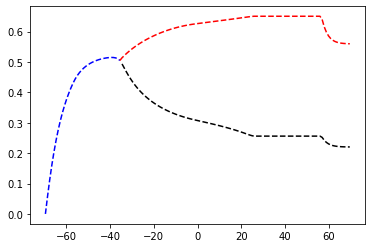

In [8]:
a5=plt.plot(dsLGM5000.YC[chanloc:],CpacLGM50ll[chanloc:]/modelhll[chanloc:],'k--')
a4=plt.plot(dsLGM5000.YC[:chanloc],CLGM50ll[:chanloc]/modelhll[:chanloc],'b--')
a4=plt.plot(dsLGM5000.YC[chanloc-1:],CLGM50ll[chanloc-1:]/modelhll[chanloc-1:],'r--')